
## GEO ALPHA - MVP ARCTIC ALBEDO INTERVENTION IMPACT SIMULATOR

### ***Model Overview***

* This model is a compact, physically informed Earth-system simulator purpose-built to quantify the climate impacts of Arctic albedo enhancement.

* Its principal aim, is to as lighlty and simply as possible, answer the following question: if we *could* intervene and alter the arctic albedo, what impact could this have for the global climate? If the results show promise, a more thorough research pathway may be pursued.

* This study is Partially inspired by Dr. Leslie Field's research on "Increasing Arctic Sea Ice Albedo Using Localized Reversible Geoengineering".  https://doi.org/10.1029/2018EF000820

* The model couples a two-box global energy-balance core (mixed layer + deep ocean) to an Arctic ice–albedo physics engine with seasonal melt–freeze dynamics across latitude bands, and links these to scenario-driven radiative forcing (flexible SSP shapes with late-century calibration), permafrost carbon feedbacks, a simple but responsive cloud radiative effect (CRE), and an AMOC stability proxy driven by freshwater fluxes.
  
* Interventions increase Arctic albedo directly and via a bounded memory/compounding mechanism, which propagates into regional band albedo, global forcing, and temperatures.
  
* The model runs ensembles with parameter uncertainty, produces rich diagnostics (global temperature, forcing decomposition, ice area/thickness, AMOC, CO₂), and is fast enough for interactive scenario sweeps and sensitivity studies.

* This allows simulation of the interplay between intervention intensity, CO₂ pathways, and Arctic seasonal melt–freeze cycles. By running multiple SSP scenarios with and without albedo enhancement, it reveals how targeted Arctic interventions can:

    - Slow global warming
    - Preserve sea ice cover and thickness
    - Reduce feedback-driven climate tipping risks


#### ***Key Functionality*** *(What You Can Do with It)*

* Run baseline vs. intervention scenarios with adjustable Arctic albedo targets and ramp rates (and optional global albedo lever).
* Choose among SSP pathways (119, 126, 245, 370, 460, 585) with shape overrides and late-century bias tuning.
* Track global metrics (ΔT, total forcing and components, CO₂ with permafrost additions, AMOC).
* Track Arctic metrics (band-0 summer/winter albedo, sea-ice area and thickness, freshwater flux).
* Compare scenarios with ensemble runs, uncertainty envelopes, and styled summary tables.
* Visualize time series, probability/box plots, and final-state metric bars.
* Perform parameter sensitivities (ECS, AMOC thresholds, aerosol effects, permafrost thaw, Arctic amplification).
* Plug in a custom forcing function or per-scenario overrides for rapid calibration/what-ifs.


#### ***Technical Features***

* 2-box EBM with explicit λ from ECS; mixed-layer and deep-ocean heat uptake (kappa) for transient response.
* Scenario ERF generator with reverse-smile (cool paths), smooth, and exp-supra (hot paths) shapes + late-century bias ramp.
* Arctic multi-band module: seasonal temps, melt-pond and thin-ice darkening, fractional coverage vs. thickness mix, hard albedo bounds, latitudinal spill + smoothing before forcing.
* Intervention memory/compounding with guarded growth and decay; soft floors on thickness/area to avoid unphysical collapse when intervening.
* Regional albedo forcing (absolute) with subtraction of expected fast-feedback albedo (to avoid double counting with ECS).
* Permafrost carbon feedback adding CO₂e on top of SSP; scenario-scaled sensitivity.
* Cloud radiative effect (CRE) responsive to ΔT, Δice area, ENSO, and intervention; capped magnitude with noise.
* AMOC proxy with threshold/collapse/recovery dynamics driven by freshwater from Arctic melt.
* Ensemble perturbations on ECS, capacities, ocean exchange, AMOC, aerosols, clouds; reproducible RNG.
* Rich state outputs each timestep for diagnostics and attribution.


#### ***What this Model adds to  Similar Small Models***

* Arctic-specific physics: Most reduced EBMs lump albedo globally; this model resolves band-0 Arctic albedo, seasonal dynamics, and intervention-induced memory, then propagates to global forcing.
* Consistent coupling: Regional albedo → band forcing (with smoothing), expected albedo feedback subtraction, and integration with permafrost, clouds, AMOC—reduces double counting and preserves physical signs.
* Scenario fidelity: Flexible SSP shape controls and late-century bias booster to match CMIP-like end-states without distorting mid-century behavior.
* Operational levers: Direct intervention tuning, ramping, and analysis tools (ensembles, attribution-ready outputs) in a fast, interactive package.


#### ***Potential Improvements***

* ***Carbon cycle realism***: Replace CO₂ concentration proxy with emissions→airborne fraction→ocean/biosphere uptake (box or impulse-response models).
* ***Clouds***: Upgrade CRE with shortwave/longwave separation, dependency on specific humidity and lapse rate; use observational priors.
* ***Ice physics***: Move from single bulk thickness/area to thickness distribution (ITD) and simple ice dynamics (advection/export).
* ***Aerosols***: Add time-varying anthropogenic aerosol forcing consistent with SSPs and regional patterns.
* ***Internal variability***: Add volcanic forcing stochasticity and a more explicit ENSO/PDO teleconnection to Arctic energy fluxes.
* ***Calibration tools***: Automated Bayesian/likelihood calibration to benchmarks (historical ΔT, sea-ice extent, AMOC proxies).


#### ***Further Development: Scaling to a ~100 km Arctic Grid (High-Resolution Upgrade)***

***Architecture & state***
*  Discretize the Arctic (e.g., 60°N–90°N) on a ~100 km mesh (curvilinear or equal-area).
*  Per-cell state: ice concentration, thickness distribution (e.g., 5–7 bins), surface albedo (snow/pond/bare ice), SST/SSTa, shortwave/longwave fluxes, snow depth, surface roughness, and carbon pools (active layer, permafrost).

***Dynamics & physics***
* Thermodynamic–dynamic sea-ice model: vertical conduction, surface energy balance, brine drainage; advection/deformation (rheology lite) and ice export through Fram Strait.
* Melt-pond & snow schemes per cell with radiative transfer; spectral albedo and pond evolution driven by degree-days and storms.
* Ocean–ice–atmosphere coupling: turbulent fluxes, net SW/LW, precipitation/snowfall; boundary currents for heat/freshwater.
* Radiative forcing mapping: Grid-cell shortwave from albedo; top-of-atmosphere translation with solar geometry and cloud fraction.
* Permafrost module (Arctic lands): soil thermal column, thaw depth, CO₂/CH₄ emissions with moisture and temperature dependence.

***Data-driven assimilation***
* Initialize and nudge with reanalysis (ERA5/CERRA) for near-surface meteorology and radiation; assimilate satellite sea-ice concentration/thickness (OSI-SAF/ICESat-2/SMOS/CS2).
* Albedo and pond fraction from MODIS/VIIRS; snow depth from satellite/blended products.
* Coupling to the global core
* Aggregate grid shortwave anomalies → regional ERF; feed to the 2-box core (or a simple 1-D latitudinal energy model) for global ΔT.
* Return global ΔT and large-scale circulation proxies to set boundary fluxes and advection tendencies (AMOC-consistent freshwater router).

***Performance & engineering***
* Use vectorized kernels/JAX/NumPyro (for inference) and domain decomposition (MPI) for multi-node runs.
* Implement tile-level fixed-timestep integrators (e.g., 3–6 h), with subcycling for fast surface processes.
* Build an I/O schema (Zarr/NetCDF) with chunking for fast slicing and post-processing.

***Intervention representation***
* Cell-level albedo operations (thin reflective films, micro-bubbles, snow management) with life-cycle/maintenance and operational aerosols side-effects.
* Spatial targeting policies (e.g., marginal ice zone first) with optimization loops (adjoint or RL) to maximize ΔERF per effort.

***Validation & calibration***
* Fit to historical sea-ice extent/thickness, surface albedo climatologies, and TOA flux anomalies; cross-validate against ship buoys and ICESat-2 freeboards.
* Use Bayesian calibration for uncertain parameters (pond growth, snow metamorphism, drag coefficients), producing posterior ensembles.



Validation: SSP baseline = ssp245, years = 80


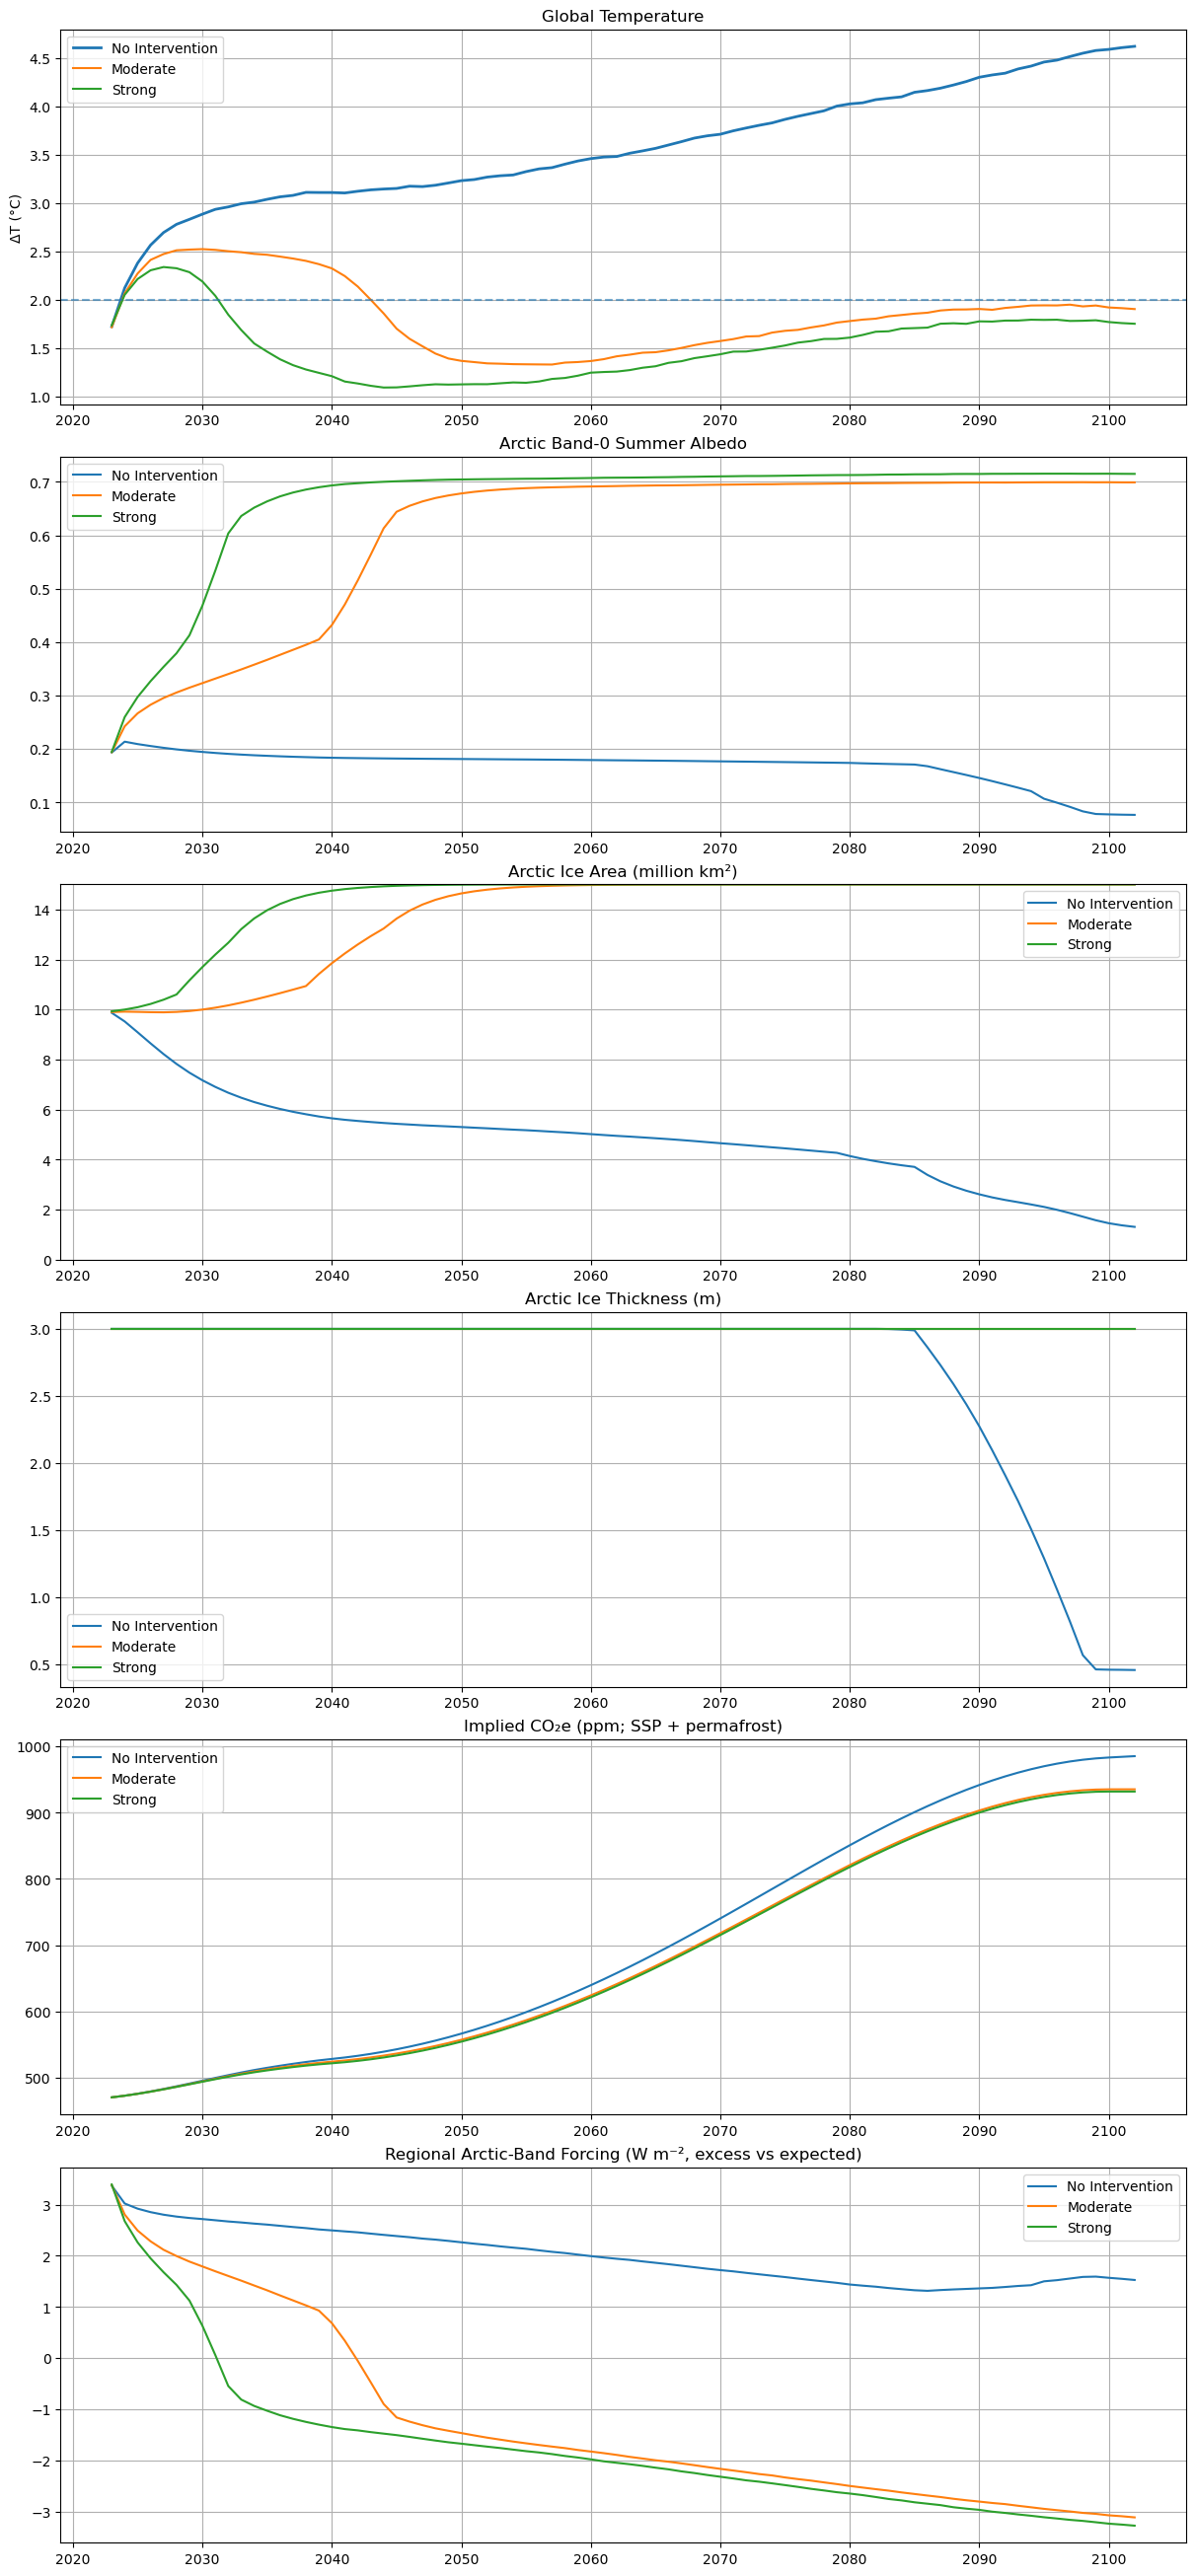


Final-year summary:
- No intervention (ssp245 → canonical 'ssp245'): ΔT = 4.62 °C, CO₂e = 985.5 ppm
- Moderate: ΔT = 1.90 °C, CO₂e = 935.4 ppm
- Strong:   ΔT = 1.75 °C, CO₂e = 932.0 ppm


In [184]:
# Earth System Model — audited & fixed + late-century SSP bias booster
# Fix: add per-scenario ERF bias ramp (2035→2100) to correct cool 2100 temps for SSP1-2.6 / 2.45 / 3.70 / 4.60 / 5.85
# SSP1-1.9 remains unmodified (already correct).
# Date: 2025-08-11

import math
import numpy as np

GLOBAL_SEED = 42
np.random.seed(GLOBAL_SEED)

# ---- Constants ----
SOLAR_CONSTANT = 1361.0            # W m-2
FREEZING_POINT = -1.8              # °C (seawater)
MAX_ICE_THICKNESS = 3.0            # m
ARCTIC_MAX_AREA = 15.0e6           # km^2 (stylized cap)
F2XCO2 = 3.7                       # W m-2 per CO2 doubling
PREINDUSTRIAL_CO2 = 280.0          # ppm
F_2019 = 2.72                      # W m-2 (~2019 ERF reference)
START_YEAR = 2023

# Physical bounds for ice-surface albedo (not the mixed band albedo)
ICE_SURFACE_ALBEDO_MIN = 0.25
ICE_SURFACE_ALBEDO_MAX = 0.82


class EarthSystemModel:
    """
    2-box global model (mixed layer + deep ocean) with Arctic seasonal/ice module,
    latitudinal albedo bands, intervention memory/feedback, permafrost CO2e, AMOC proxy,
    and a simple Cloud Radiative Effect (CRE).

    Flexible SSP trajectories via set_scenario_overrides(...) or forcing_override_fn.
    """

    # ---------- Scenario utilities ----------
    _SCENARIO_ALIASES = {
        'sp119': 'ssp119', 'sp126': 'ssp126', 'sp245': 'ssp245',
        'sp370': 'ssp370', 'sp460': 'ssp460', 'sp585': 'ssp585',
        'ssp240': 'ssp245', 'ssp24': 'ssp245',
        '245': 'ssp245', '370': 'ssp370', '460': 'ssp460', '585': 'ssp585',
        'rcp19': 'ssp119', 'rcp26': 'ssp126', 'rcp45': 'ssp245',
        'rcp60': 'ssp460', 'rcp70': 'ssp370', 'rcp85': 'ssp585',
    }

    # Default (pre-calibration) ERF targets for 2100 (W m-2)
    _SCENARIO_TARGETS_2100 = {
        'ssp119': 1.9,
        'ssp126': 2.3,
        'ssp245': 4.5,
        'ssp370': 7.0,
        'ssp460': 6.0,
        'ssp585': 8.5,
    }

    # Default shape parameters
    _SCENARIO_SHAPES = {
        'ssp119': {'type': 'reverse_smile', 'peak_year': 2040,
                   'peak_ratio_final': 1.08, 'peak_min_over_2019': 1.06, 'decay_pow': 2.2},
        'ssp126': {'type': 'reverse_smile', 'peak_year': 2040,
                   'peak_ratio_final': 1.06, 'peak_min_over_2019': 1.04, 'decay_pow': 2.0},
        'ssp245': {'type': 'smooth',    'mid_year': 2040, 'mid_frac': 0.50},
        'ssp460': {'type': 'exp_supra', 'mid_year': 2040, 'mid_frac': 0.28, 'exp_power': 1.35},
        'ssp370': {'type': 'exp_supra', 'mid_year': 2040, 'mid_frac': 0.26, 'exp_power': 1.45},
        'ssp585': {'type': 'exp_supra', 'mid_year': 2040, 'mid_frac': 0.22, 'exp_power': 1.60},
    }

    # Scenario severity for permafrost scaling
    _SCENARIO_PERMA_SCALE = {
        'ssp119': 0.10,
        'ssp126': 0.20,
        'ssp245': 0.70,
        'ssp370': 1.15,
        'ssp460': 1.05,
        'ssp585': 1.35,
    }

    # NEW: late-century ERF bias booster (W m-2 added by 2100), smooth ramp after 2035.
    # Tuned to fix the user-reported cool bias: ~0.5°C for SSP1-2.6; ~1.5°C for mid/high scenarios.
    # λ ≈ F2XCO2/ECS = 3.7/2.6 ≈ 1.423 W m-2 K-1 ⇒ 0.5°C ≈ 0.71 W m-2; 1.5°C ≈ 2.13 W m-2.
    # We use a ~20% uplift to account for transient ocean uptake ⇒ ~0.85 and ~2.6 W m-2.
    _SCENARIO_BIAS_2100 = {
        'ssp119': 0.0,   # already correct
        'ssp126': 0.85,  # +~0.5°C by 2100
        'ssp245': 2.6,   # +~1.5°C
        'ssp370': 2.6,   # +~1.5°C
        'ssp460': 2.6,   # +~1.5°C
        'ssp585': 2.6,   # +~1.5°C
    }
    _BIAS_START_YEAR_DEFAULT = 2035.0  # begin smooth ramp so mid-century shape is preserved

    def _canonical_scenario(self, s):
        s = str(s).strip().lower()
        return self._SCENARIO_ALIASES.get(s, s)

    def __init__(self, seed=GLOBAL_SEED, scenario='ssp460', scenario_overrides=None, forcing_override_fn=None):
        """
        scenario_overrides: dict keyed by canonical scenario name with optional keys:
            {
              'F2100': float,             # override 2100 ERF target (pre-calibration)
              'calibration': float,       # multiply target by this factor
              'F2019': float,             # override reference 2019 ERF (default 2.72)
              'shape': 'reverse_smile'|'exp_supra'|'smooth',
              'params': { ... },          # shape-specific params
              'bias_2100': float,         # override late-century ERF bias (W m-2 at 2100)
              'bias_start_year': float    # override ramp start year (default 2035)
            }
        forcing_override_fn: callable(year, scenario, defaults_dict) -> ERF (W m-2)
            If provided, this replaces internal SSP logic entirely.
        """
        self.rng = np.random.RandomState(seed)
        self._set_default_params()

        canon = self._canonical_scenario(scenario)
        if canon not in self._SCENARIO_TARGETS_2100:
            canon = 'ssp460'
        self.scenario = canon

        self.scenario_overrides = scenario_overrides.copy() if isinstance(scenario_overrides, dict) else {}
        self.forcing_override_fn = forcing_override_fn

        # Feedback from ECS
        self.params['lambda_feedback'] = float(F2XCO2) / float(self.params['ecs'])

        # Bands
        self.band_centers = np.array([85.0, -75.0, -45.0, -15.0, 15.0, 45.0, 75.0])
        self.band_areas_nominal = np.array([0.06, 0.10, 0.20, 0.25, 0.25, 0.15, 0.05])

        # Initialize
        self.reset(seed)

    def set_scenario_overrides(self, overrides):
        if not isinstance(overrides, dict): return
        if not hasattr(self, 'scenario_overrides') or not isinstance(self.scenario_overrides, dict):
            self.scenario_overrides = {}
        for scen, cfg in overrides.items():
            c = self._canonical_scenario(scen)
            cur = self.scenario_overrides.get(c, {})
            if 'params' in cfg and 'params' in cur:
                p = cur['params'].copy(); p.update(cfg['params'])
                tmp = cfg.copy(); tmp['params'] = p
                cur.update(tmp)
            else:
                cur.update(cfg)
            self.scenario_overrides[c] = cur

    def _set_default_params(self):
        self.params = {
            # ----------------- Climate response (2-box) -----------------
            'ecs': 2.6,
            'C_mixed': 7.0,          # W·yr m^-2 K^-1
            'C_deep': 100.0,         # W·yr m^-2 K^-1
            'kappa_ocean': 0.7,      # W m^-2 K^-1

            # ----------------- Arctic baseline -----------------
            'arctic_base_temp': -20.0,
            'arctic_amplification': 2.0,

            # Ocean albedo
            'ocean_albedo': 0.07,

            # Ice optics & darkening (bounded)
            'arctic_albedo_base': 0.65,
            'warm_albedo_decline_gain': 0.022,
            'warm_albedo_max_drop': 0.22,
            'melt_pond_factor': 0.11,
            'melt_pond_max_drop': 0.26,
            'thin_ice_darkening_gain': 0.26,
            'thin_ice_max_drop': 0.18,
            'coverage_weight': 0.5,

            # Intervention mitigation
            'mitigate_warm': 1.0,
            'mitigate_pond': 1.0,
            'mitigate_thin': 0.8,

            # Area guard acts ONLY with intervention
            'area_guard_strength': 0.65,

            # Seasonal structure & amplitude
            'seasonal_amp_base': 18.5,
            'seasonal_amp_warm_slope': 0.18,
            'seasonal_amp_mitigate': 0.18,

            # Local Arctic cooling per eff (capped)
            'arctic_local_cooling_per_eff': 6.5,
            'arctic_local_cooling_warm_slope': 0.06,
            'arctic_local_cooling_cap': 2.5,

            # Freeze / melt baseline (per month)
            'freeze_threshold_offset': -2.0,
            'freeze_rate': 0.18,
            'melt_rate': 0.14,

            # Warming-aware seasonal scaling
            'freeze_rate_warm_slope': 0.05,
            'melt_rate_warm_slope': 0.065,
            'area_gain_warm_slope': 0.08,

            # Area budget units (km^2 per relevant month)
            'area_gain_unit_km2': 0.30e6,
            'area_loss_unit_km2': 0.80e6,

            # Adaptive compounding
            'eff_warm_scale': 0.08,
            'freeze_scale_eff_boost': 1.00,
            'melt_scale_eff_cut': 0.95,
            'gain_scale_eff_boost': 1.05,
            'restorative_gain_eff': 0.90,
            'area_loss_eff_cut_pow': 1.2,
            'area_loss_eff_cut_max': 0.985,
            'area_loss_min_base': 0.03,
            'area_loss_min_floor': 0.005,

            # Soft floors (only when intervention>0)
            'thickness_floor_per_eff': 0.9,    # m per unit eff
            'thickness_floor_cap': 1.0,        # m
            'area_floor_per_eff': 6.0e6,       # km^2 per unit eff
            'area_floor_cap': 8.0e6,           # km^2

            # Intervention mitigation for melt & area loss
            'mitigate_melt': 0.85,
            'mitigate_area_loss': 0.85,

            # ----------------- Permafrost & GHG -----------------
            'permafrost_carbon_base': 1200.0,
            'permafrost_thaw_factor': 0.00009,
            'permafrost_threshold_anom': 1.2,
            'ch4_fraction': 0.015,
            'ch4_gwp': 25.0,

            # ----------------- AMOC (proxy) -----------------
            'amoc_threshold': 0.18,
            'amoc_collapse_level': 10.0,
            'amoc_arctic_slope': -0.12,
            'amoc_freshwater_slope': -0.22,

            # ----------------- Intervention & memory -----------------
            'intervention_feedback_gain': 1.2,
            'arctic_memory_gain': 0.25,
            'arctic_memory_mult': 0.9,
            'arctic_memory_decay': 0.25,
            'arctic_memory_max': 0.98,
            'arctic_spill_fraction': 0.25,

            # Regional Arctic albedo coupling
            'arctic_forcing_efficiency': 0.60,

            # Subtract fast-feedback surface albedo implicit in ECS
            'albedo_feedback_expected_per_deg': 0.28,  # W m-2 per °C

            # Global intervention lever (opt-in)
            'global_intervention_albedo_gain': 0.045,

            # ---------- Default SSP calibration (overrideable) ----------
            'baseline_calibration_factor': {
                'ssp119': 0.72,
                'ssp126': 0.76,
                'ssp245': 0.85,
                'ssp370': 1.14,
                'ssp460': 1.10,
                'ssp585': 1.32,
            },

            # Aerosol side-effect from operations (applied only)
            'aerosol_direct_effect': -0.5,
            'aerosol_cloud_effect': -0.3,

            # ENSO
            'enso_amplitude': 0.45,
            'enso_period_years': 4.0,
            'enso_innovation_sigma': 0.18,

            # Latitude smoothing
            'latitude_feedback_gain': 0.12,

            # -------- CLOUD MODULE (gentle) --------
            'cloud_temp_sensitivity': 0.03,
            'cloud_icearea_coupling': -0.20,
            'cloud_intervention_coupling': -0.25,
            'cloud_enso_coupling': -0.04,
            'cloud_noise_sigma': 0.06,
            'cloud_forcing_cap': 0.40,

            # -------- Placeholder for ensemble compatibility --------
            'water_vapor_feedback': 0.0,
        }

    def reset(self, seed=None):
        if seed is not None:
            self.rng = np.random.RandomState(seed)
        self.time = float(START_YEAR)

        # 2-box temperatures
        self.T_mixed = 1.1
        self.T_deep  = 0.8
        self.T_surface = self.T_mixed

        # GHG bookkeeping
        self.co2_extra = 0.0
        self.co2 = 420.0

        # Forcings
        self.albedo_forcing_regional = 0.0
        self.albedo_forcing_global = 0.0
        self.aerosol_forcing = 0.0
        self.cloud_forcing = 0.0

        # Regions
        self.regions = {}
        self.regions['arctic'] = {
            'temp_anom': float(self.params['arctic_amplification'] * self.T_surface),
            'temp': float(self.params['arctic_base_temp'] + self.params['arctic_amplification'] * self.T_surface),
            'albedo': float(self.params['arctic_albedo_base']),
            'ice_area': 10.0e6,
            'ice_thickness': 2.0,
            'freshwater_flux': 0.0,
            'intervention_value': 0.0,
            'base_albedo': float(self.params['arctic_albedo_base']),
            'permafrost_carbon': float(self.params['permafrost_carbon_base'])
        }
        self.regions['global'] = {'temp_surface': self.T_surface, 'temp_land': self.T_surface * 1.7, 'temp_ocean': self.T_surface * 0.9}
        self.regions['tropics'] = {'precip': 100.0, 'enso_phase': 0.0}
        self.regions['ocean'] = {'amoc': 17.0, 'amoc_stable_branch': True, 'collapse_counter': 0}

        # Bands
        nominal = np.array(self.band_areas_nominal, dtype=float)
        if nominal.sum() <= 0:
            nominal = np.ones_like(nominal) / len(nominal)
        self.band_areas = nominal / nominal.sum()
        self.band_albedos = np.array([self.params['arctic_albedo_base'], 0.30, 0.30, 0.15, 0.12, 0.30, 0.60], dtype=float)
        insolation_raw = np.cos(np.deg2rad(np.abs(self.band_centers))) * self.band_areas
        self.band_insolation_weights = insolation_raw / (insolation_raw.sum() + 1e-16)

        # Fixed reference albedo for absolute regional forcing
        self.reference_band_albedos = self.band_albedos.copy()

        # Memory & applied
        self.arctic_memory = 0.0
        self.prev_ice_thickness = float(self.regions['arctic']['ice_thickness'])
        self.prev_ice_area = float(self.regions['arctic']['ice_area'])
        self.applied_intervention = 0.0
        self.applied_intervention_global = 0.0  # opt-in

        # Seasonal snapshots
        self.seasonal_state = {'summer_albedo': float(self.params['arctic_albedo_base']),
                               'winter_albedo': float(self.params['arctic_albedo_base']),
                               'summer_temp': float(self.params['arctic_base_temp']),
                               'winter_temp': float(self.params['arctic_base_temp'])}

        self._update_enso(0.0)

        # Reference for expected-feedback subtraction & clouds
        self.cloud_ref = {
            'T_surface_ref': float(self.T_surface),
            'ice_area_ref': float(self.regions['arctic']['ice_area'])
        }

    # ---------- helper: smooth easing ----------
    @staticmethod
    def _ease_cos(frac):
        frac = float(np.clip(frac, 0.0, 1.0))
        return 0.5 * (1.0 - math.cos(math.pi * frac))

    # ---------- SSP forcing (with per-scenario overrides & custom function) ----------
    def _ssp_forcing_proxy(self, year):
        s = self.scenario
        if callable(self.forcing_override_fn):
            defaults = {
                'F2019': F_2019,
                'F2100_default': self._SCENARIO_TARGETS_2100.get(s, 6.0),
                'shape_default': self._SCENARIO_SHAPES.get(s, {'type': 'smooth', 'mid_year': 2040, 'mid_frac': 0.5}),
                'calibration_default': self.params.get('baseline_calibration_factor', {}).get(s, 1.0),
            }
            return float(self.forcing_override_fn(year, s, defaults))

        y0, y_mid_default, y1 = 2019.0, 2040.0, 2100.0
        ov = self.scenario_overrides.get(s, {})
        F0 = float(ov.get('F2019', F_2019))

        F1_pre = ov.get('F2100', self._SCENARIO_TARGETS_2100.get(s, 6.0))
        calib_map = self.params.get('baseline_calibration_factor', {})
        calib_default = float(calib_map.get(s, 1.0))
        calib = float(ov.get('calibration', calib_default))
        F1 = max(0.0, float(F1_pre) * calib)

        base_shape = self._SCENARIO_SHAPES.get(s, {'type': 'smooth', 'mid_year': y_mid_default, 'mid_frac': 0.5}).copy()
        shape_type = ov.get('shape', base_shape.get('type', 'smooth'))
        params = base_shape; params.update(ov.get('params', {}))

        if year <= y0:  F_base = F0
        elif year >= y1:  F_base = F1
        else:
            if shape_type == 'reverse_smile':
                peak_year = float(params.get('peak_year', y_mid_default))
                prf  = float(params.get('peak_ratio_final', 1.05))
                p19  = float(params.get('peak_min_over_2019', 1.03))
                pdec = float(params.get('decay_pow', 1.8))
                Fpeak = max(F1 * prf, F0 * p19)
                if year <= peak_year:
                    t = (year - y0) / (peak_year - y0)
                    F_base = F0 + (Fpeak - F0) * self._ease_cos(t)
                else:
                    tau = (year - peak_year) / (y1 - peak_year)
                    F_base = F1 + (Fpeak - F1) * ((1.0 - tau) ** pdec)
            elif shape_type == 'exp_supra':
                mid_year = float(params.get('mid_year', y_mid_default))
                mid_frac = float(params.get('mid_frac', 0.30))
                exp_pow  = float(params.get('exp_power', 1.25))
                Fmid = max(1e-6, F0 + mid_frac * (F1 - F0))
                if year <= mid_year:
                    t = (year - y0) / (mid_year - y0)
                    F_base = F0 + (Fmid - F0) * self._ease_cos(t)
                else:
                    tau = (year - mid_year) / (y1 - mid_year)
                    k = math.log(max(1e-9, F1 / Fmid))
                    F_base = Fmid * math.exp(k * (tau ** exp_pow))
            else:  # smooth
                mid_year = float(params.get('mid_year', y_mid_default))
                mid_frac = float(params.get('mid_frac', 0.5))
                Fmid = F0 + mid_frac * (F1 - F0)
                if year <= mid_year:
                    t = (year - y0) / (mid_year - y0)
                    F_base = F0 + (Fmid - F0) * self._ease_cos(t)
                else:
                    t = (year - mid_year) / (y1 - mid_year)
                    F_base = Fmid + (F1 - Fmid) * self._ease_cos(t)

        # ---- NEW: late-century bias booster (smooth ramp from bias_start_year → 2100) ----
        bias_2100 = float(ov.get('bias_2100', self._SCENARIO_BIAS_2100.get(s, 0.0)))
        bias_start = float(ov.get('bias_start_year', self._BIAS_START_YEAR_DEFAULT))
        if bias_2100 != 0.0 and year > bias_start:
            w = self._ease_cos((year - bias_start) / (y1 - bias_start))
            F_base = F_base + bias_2100 * w
        return F_base

    # ---------- other helpers ----------
    def _update_enso(self, dt):
        phase = self.regions['tropics']['enso_phase']
        period = float(self.params['enso_period_years'])
        if period <= 0: return
        dphase = (2.0 * math.pi / period) * dt
        innovation = float(self.params['enso_amplitude']) * self.rng.normal(0.0, self.params['enso_innovation_sigma'])
        self.regions['tropics']['enso_phase'] = float(np.clip(0.8 * (phase + dphase) + innovation, -1.0, 1.0))

    def _bounded_ice_surface_albedo(self, base_ice_albedo, arctic_abs_temp, ice_thickness, eff_proc, coverage):
        dyn_min = ICE_SURFACE_ALBEDO_MIN + 0.15 * coverage * eff_proc
        dyn_min = float(np.clip(dyn_min, ICE_SURFACE_ALBEDO_MIN, ICE_SURFACE_ALBEDO_MAX - 0.02))
        ice_alb = float(np.clip(base_ice_albedo, dyn_min, ICE_SURFACE_ALBEDO_MAX))

        anom = max(0.0, arctic_abs_temp - float(self.params['arctic_base_temp']))
        warm_drop = min(self.params['warm_albedo_max_drop'], self.params['warm_albedo_decline_gain'] * anom)
        warm_drop *= (1.0 - self.params['mitigate_warm'] * eff_proc)

        temp_above_freezing = max(0.0, arctic_abs_temp - FREEZING_POINT)
        pond_raw = self.params['melt_pond_factor'] * temp_above_freezing
        pond_drop = min(self.params['melt_pond_max_drop'], pond_raw)
        pond_drop *= (1.0 - self.params['mitigate_pond'] * eff_proc)

        thinness = max(0.0, (1.5 - float(ice_thickness)) / 1.5)
        thin_drop = min(self.params['thin_ice_max_drop'], self.params['thin_ice_darkening_gain'] * thinness)
        thin_drop *= (1.0 - self.params['mitigate_thin'] * eff_proc)

        guard_strength = float(self.params['area_guard_strength']) * eff_proc
        area_guard = float(np.clip(1.0 - guard_strength * coverage, 0.4, 1.0))
        total_drop = (warm_drop + pond_drop + thin_drop) * area_guard

        ice_alb = ice_alb - total_drop
        ice_alb = float(np.clip(ice_alb, dyn_min, ICE_SURFACE_ALBEDO_MAX))
        return ice_alb

    def _spectral_albedo(self, base_ice_albedo, arctic_abs_temp, ice_thickness, ice_area, eff_proc):
        coverage = float(np.clip(ice_area / ARCTIC_MAX_AREA, 0.0, 1.0))
        ice_surface_alb = self._bounded_ice_surface_albedo(base_ice_albedo, arctic_abs_temp, ice_thickness, eff_proc, coverage)
        wt = float(self.params['coverage_weight'])
        frac_from_thickness = np.clip(ice_thickness / MAX_ICE_THICKNESS, 0.0, 1.0)
        ice_fraction = np.clip(wt * coverage + (1.0 - wt) * frac_from_thickness, 0.0, 1.0)
        ocean_alb = float(self.params['ocean_albedo'])
        mixed = ice_surface_alb * ice_fraction + ocean_alb * (1.0 - ice_fraction)
        return float(np.clip(mixed, ocean_alb, ICE_SURFACE_ALBEDO_MAX))

    def _seasonal_ice_cycle(self, arctic_abs_temp_preseason, eff_proc):
        months = np.linspace(0.0, 2.0 * math.pi, 12, endpoint=False)
        base = float(self.params['arctic_base_temp'])

        # Local Arctic cooling from intervention (scaled by warming; capped)
        anom_pre = max(0.0, arctic_abs_temp_preseason - base)
        cool = self.params['arctic_local_cooling_per_eff'] * eff_proc
        cool *= (1.0 + self.params['arctic_local_cooling_warm_slope'] * anom_pre)
        cool = min(cool, self.params['arctic_local_cooling_cap'])
        arctic_abs_temp_preseason_eff = arctic_abs_temp_preseason - cool

        # Warming-aware base scalars
        anom = max(0.0, arctic_abs_temp_preseason_eff - base)
        freeze_scale = max(0.0, 1.0 - self.params['freeze_rate_warm_slope'] * anom)
        melt_scale   = 1.0 + self.params['melt_rate_warm_slope']  * anom
        gain_scale   = max(0.0, 1.0 - self.params['area_gain_warm_slope'] * anom)

        # Adaptive compounding
        freeze_scale *= (1.0 + self.params['freeze_scale_eff_boost'] * eff_proc)
        melt_scale   *= (1.0 - self.params['melt_scale_eff_cut']   * eff_proc)
        gain_scale   *= (1.0 + self.params['gain_scale_eff_boost'] * eff_proc)

        # Seasonal amplitude
        seasonal_amp = float(
            self.params['seasonal_amp_base']
            + self.params['seasonal_amp_warm_slope'] * (arctic_abs_temp_preseason_eff - base)
        )
        seasonal_amp *= (1.0 - self.params['seasonal_amp_mitigate'] * eff_proc)
        seasonal_amp = max(8.0, seasonal_amp)

        monthly_temps = arctic_abs_temp_preseason_eff + seasonal_amp * np.sin(months)

        ice_thickness = float(self.regions['arctic']['ice_thickness'])
        ice_area = float(self.regions['arctic']['ice_area'])

        summer_albedo = float('inf'); winter_albedo = float('-inf')
        summer_temp = float('-inf');  winter_temp = float('inf')

        for temp in monthly_temps:
            month_albedo = self._spectral_albedo(self.regions['arctic']['base_albedo'], temp, ice_thickness, ice_area, eff_proc)

            if month_albedo < summer_albedo:
                summer_albedo = month_albedo; summer_temp = temp
            if month_albedo > winter_albedo:
                winter_albedo = month_albedo;  winter_temp = temp

            coverage = float(np.clip(ice_area / ARCTIC_MAX_AREA, 0.0, 1.0))
            open_fraction = 1.0 - coverage
            thin_factor = float(np.clip((1.4 - ice_thickness) / 1.4, 0.0, 1.0))

            if temp < (base + self.params['freeze_threshold_offset']):
                growth = self.params['freeze_rate'] * freeze_scale
                ice_thickness += growth
                added_area = open_fraction * self.params['area_gain_unit_km2'] * gain_scale * (1.0 + self.params['restorative_gain_eff'] * eff_proc)
                ice_area = min(ARCTIC_MAX_AREA, ice_area + added_area)
            elif temp <= FREEZING_POINT:
                growth = 0.5 * self.params['freeze_rate'] * freeze_scale
                ice_thickness += growth
                added_area = 0.5 * open_fraction * self.params['area_gain_unit_km2'] * gain_scale * (1.0 + 0.7 * self.params['restorative_gain_eff'] * eff_proc)
                ice_area = min(ARCTIC_MAX_AREA, ice_area + added_area)
            else:
                deg = min(1.0, (temp - FREEZING_POINT) / 5.0)
                melt_amount = self.params['melt_rate'] * melt_scale * deg
                melt_amount *= (1.0 - self.params['mitigate_melt'] * eff_proc)
                ice_thickness = max(0.02, ice_thickness - melt_amount)

                area_loss = coverage * self.params['area_loss_unit_km2'] * (0.6 + 0.4 * deg) * (0.6 + 0.4 * thin_factor)
                area_loss *= melt_scale
                cut = min(self.params['area_loss_eff_cut_max'],
                          (eff_proc ** self.params['area_loss_eff_cut_pow']) * self.params['area_loss_eff_cut_max'])
                area_loss *= (1.0 - cut)
                area_loss *= (1.0 - self.params['mitigate_area_loss'] * eff_proc)
                floor_frac = max(self.params['area_loss_min_floor'],
                                 self.params['area_loss_min_base'] * (1.0 - 0.85 * eff_proc))
                area_loss = max(area_loss, floor_frac * self.params['area_loss_unit_km2'] * coverage)
                ice_area = max(0.5e6, ice_area - area_loss)

        self.seasonal_state['summer_albedo'] = float(summer_albedo)
        self.seasonal_state['winter_albedo'] = float(winter_albedo)
        self.seasonal_state['summer_temp'] = float(summer_temp)
        self.seasonal_state['winter_temp'] = float(winter_temp)

        ice_thickness = float(np.clip(ice_thickness, 0.02, MAX_ICE_THICKNESS))
        ice_area      = float(np.clip(ice_area, 0.5e6, ARCTIC_MAX_AREA))
        if eff_proc > 0.0:
            th_floor = min(self.params['thickness_floor_cap'],
                           self.params['thickness_floor_per_eff'] * eff_proc)
            ar_floor = min(self.params['area_floor_cap'],
                           self.params['area_floor_per_eff'] * eff_proc)
            ice_thickness = max(ice_thickness, th_floor)
            ice_area      = max(ice_area, ar_floor)

        self.regions['arctic']['ice_thickness'] = ice_thickness
        self.regions['arctic']['ice_area'] = ice_area

    def _scenario_permafrost_scale(self):
        return float(self._SCENARIO_PERMA_SCALE.get(self.scenario, 1.0))

    def _update_permafrost(self, arctic_abs_temp, dt):
        scale = self._scenario_permafrost_scale()
        arctic_anom = arctic_abs_temp - float(self.params['arctic_base_temp'])
        threshold = float(self.params['permafrost_threshold_anom'])
        if arctic_anom > threshold and scale > 0.0:
            arctic = self.regions['arctic']
            temp_excess = min(arctic_anom - threshold, 12.0)
            thaw_rate = (self.params['permafrost_thaw_factor'] * scale) * (temp_excess ** 1.5)
            emissions = thaw_rate * arctic['permafrost_carbon'] * dt
            arctic['permafrost_carbon'] = max(0.0, arctic['permafrost_carbon'] - emissions)
            ch4_em = emissions * self.params['ch4_fraction']
            co2_em = emissions * (1.0 - self.params['ch4_fraction'])
            co2_equiv = co2_em + ch4_em * self.params['ch4_gwp']
            ppm_increase = co2_equiv / 2.12
            return float(ppm_increase)
        return 0.0

    def _regional_albedo_forcing_absolute(self, bands):
        delta = np.asarray(bands, dtype=float) - np.asarray(self.reference_band_albedos, dtype=float)
        forcing_per_band = - delta * (SOLAR_CONSTANT / 4.0) * self.band_insolation_weights
        eff = float(self.params['arctic_forcing_efficiency'])
        return float(np.sum(forcing_per_band) * eff)

    def _update_regional_feedbacks(self):
        n = self.band_albedos.size
        if n <= 2: return
        gamma = float(self.params['latitude_feedback_gain']) * 0.02
        new = self.band_albedos.copy()
        for i in range(1, n - 1):
            new[i] = new[i] + gamma * ((self.band_albedos[i - 1] + self.band_albedos[i + 1]) / 2.0 - self.band_albedos[i])
        self.band_albedos = np.clip(new, 0.01, 0.99)
        self.band_albedos[0] = float(self.regions['arctic']['albedo'])

    # ------------ CLOUD MODULE ------------
    def _compute_cloud_forcing(self, effective_intervention, enso_phase):
        ps = self.params
        dTg = float(self.T_surface - self.cloud_ref['T_surface_ref'])
        ice_area = float(self.regions['arctic']['ice_area'])
        dA = float((ice_area - self.cloud_ref['ice_area_ref']) / ARCTIC_MAX_AREA)
        noise = ps['cloud_noise_sigma'] * self.rng.normal()
        F_cloud = (
            ps['cloud_temp_sensitivity']        * dTg +
            ps['cloud_icearea_coupling']        * dA  +
            ps['cloud_intervention_coupling']   * float(effective_intervention) +
            ps['cloud_enso_coupling']           * float(enso_phase) +
            noise
        )
        cap = float(ps['cloud_forcing_cap'])
        return float(np.clip(F_cloud, -cap, cap))

    # ------------ main update loop (one year) ------------
    def update(self, interventions=None, dt=1.0):
        if interventions is None:
            interventions = {}

        arctic = self.regions['arctic']
        ocean = self.regions['ocean']

        # 1) SSP baseline forcing
        F_ssp = self._ssp_forcing_proxy(self.time)

        # 2) Arctic applied intervention ramp
        arc_in = interventions.get('arctic', None)
        if arc_in is None:
            target, ramp = self.applied_intervention, 0
        elif isinstance(arc_in, dict):
            target = float(arc_in.get('target', 0.0)); ramp = int(arc_in.get('ramp_years', 0))
        else:
            target, ramp = float(arc_in), 0

        if ramp <= 0:
            self.applied_intervention = float(np.clip(target, 0.0, 0.99))
        else:
            delta_target = target - self.applied_intervention
            step = float(delta_target) / float(max(1, ramp))
            new_applied = self.applied_intervention + step
            if (delta_target > 0 and new_applied > target) or (delta_target < 0 and new_applied < target):
                new_applied = target
            self.applied_intervention = float(np.clip(new_applied, 0.0, 0.99))

        # 2b) Global applied intervention ramp (OPT-IN only if 'global' is provided)
        glob_in = interventions.get('global', None)
        if glob_in is None:
            self.applied_intervention_global = 0.0
        else:
            if isinstance(glob_in, dict):
                gtarget = float(glob_in.get('target', 0.0)); gramp = int(glob_in.get('ramp_years', 0))
            else:
                gtarget, gramp = float(glob_in), 0
            if gramp <= 0:
                self.applied_intervention_global = float(np.clip(gtarget, 0.0, 0.99))
            else:
                delta_target = gtarget - self.applied_intervention_global
                step = float(delta_target) / float(max(1, gramp))
                new_applied = self.applied_intervention_global + step
                if (delta_target > 0 and new_applied > gtarget) or (delta_target < 0 and new_applied < gtarget):
                    new_applied = gtarget
                self.applied_intervention_global = float(np.clip(new_applied, 0.0, 0.99))

        # 3) Effective intervention (applied + memory)
        memory_before = float(self.arctic_memory)
        effective_intervention = float(np.clip(self.applied_intervention + memory_before, 0.0, 0.99))
        arctic['intervention_value'] = float(self.applied_intervention)

        # Process-level effective (warmer → stronger)
        pre_anom = max(0.0, (self.params['arctic_base_temp'] + self.params['arctic_amplification'] * self.T_surface) - self.params['arctic_base_temp'])
        eff_proc = float(np.clip(effective_intervention * (1.0 + self.params['eff_warm_scale'] * pre_anom), 0.0, 0.99))

        # Base ICE-SURFACE albedo
        arctic['base_albedo'] = float(np.clip(
            self.params['arctic_albedo_base'] + eff_proc,
            ICE_SURFACE_ALBEDO_MIN, ICE_SURFACE_ALBEDO_MAX
        ))

        # 4) Pre-season Arctic temps (absolute)
        arctic_temp_anom_pre = float(self.params['arctic_amplification'] * self.T_surface)
        arctic_abs_temp_pre = float(self.params['arctic_base_temp'] + arctic_temp_anom_pre)
        arctic['temp_anom'] = arctic_temp_anom_pre
        base_cool = self.params['arctic_local_cooling_per_eff'] * eff_proc
        arctic['temp'] = float(arctic_abs_temp_pre - min(base_cool, self.params['arctic_local_cooling_cap']))

        # 5) Seasonal cycle (uses eff_proc)
        prev_thickness = float(arctic['ice_thickness'])
        prev_area = float(arctic['ice_area'])
        prev_band_albedos = self.band_albedos.copy()

        self._seasonal_ice_cycle(arctic['temp'], eff_proc)

        # Summer band albedo becomes the updated band-0 value
        local_arctic_albedo_post = self.seasonal_state['summer_albedo']

        # 6) Update band albedos, compute base_delta, then SMOOTH before forcing
        new_band_albedos = prev_band_albedos.copy()
        new_band_albedos[0] = float(np.clip(local_arctic_albedo_post, 0.01, 0.99))
        base_delta = new_band_albedos[0] - prev_band_albedos[0]

        # Spill to neighbors
        spill = float(self.params['arctic_spill_fraction']) * (0.5 + 0.5 * eff_proc)
        lat_distances = 85.0 - np.abs(self.band_centers)
        lat_distances = np.clip(lat_distances, 0.0, None)
        neighbor_weights = np.zeros_like(lat_distances)
        neighbor_mask = (np.arange(lat_distances.size) != 0)
        neighbor_weights[neighbor_mask] = lat_distances[neighbor_mask]
        if neighbor_weights.sum() > 0:
            neighbor_weights /= neighbor_weights.sum()
        else:
            neighbor_weights[neighbor_mask] = 1.0 / max(1, neighbor_mask.sum())
        for i in range(1, new_band_albedos.size):
            band_change = spill * base_delta * neighbor_weights[i]
            new_band_albedos[i] = float(np.clip(new_band_albedos[i] + band_change, 0.01, 0.99))

        # Commit bands & regional feedback smoothing BEFORE forcing
        self.band_albedos = new_band_albedos.copy()
        arctic['albedo'] = float(self.band_albedos[0])
        self._update_regional_feedbacks()                   # sync fix
        arctic['albedo'] = float(self.band_albedos[0])      # keep band-0 authoritative

        # 7) Regional albedo forcing (absolute vs reference) with expected-feedback subtraction
        Freg_abs = self._regional_albedo_forcing_absolute(self.band_albedos)
        dTg = float(self.T_surface - self.cloud_ref['T_surface_ref'])
        Freg_expected = float(self.params['albedo_feedback_expected_per_deg']) * dTg
        self.albedo_forcing_regional = Freg_abs - Freg_expected

        # 8) Global intervention forcing (OPT-IN only)
        if self.applied_intervention_global > 0.0:
            delta_global_albedo = float(self.params['global_intervention_albedo_gain']) * self.applied_intervention_global
            self.albedo_forcing_global = - delta_global_albedo * (SOLAR_CONSTANT / 4.0)
        else:
            self.albedo_forcing_global = 0.0

        # 9) Aerosol side-effect (operations only; uses applied only)
        self.aerosol_forcing = self.applied_intervention * (self.params['aerosol_direct_effect'] + self.params['aerosol_cloud_effect'])

        # 10) Permafrost-aware GHG forcing (with scenario scaling)
        co2_equiv_baseline = PREINDUSTRIAL_CO2 * math.exp(F_ssp / 5.35)
        total_co2 = co2_equiv_baseline + self.co2_extra
        deltaF_permafrost = 0.0 if co2_equiv_baseline <= 0 else 5.35 * math.log(max(1e-14, total_co2 / co2_equiv_baseline))
        total_ghg_forcing = float(F_ssp + deltaF_permafrost)
        self.co2 = float(total_co2)

        # 11) CLOUD MODULE
        enso_for_cloud = float(self.regions['tropics']['enso_phase'])
        self.cloud_forcing = self._compute_cloud_forcing(effective_intervention, enso_for_cloud)

        # 12) Net forcing
        net_forcing = (total_ghg_forcing +
                       self.albedo_forcing_regional +
                       self.albedo_forcing_global +
                       self.aerosol_forcing +
                       self.cloud_forcing)

        # 13) 2-box temperature update (Euler, yearly dt)
        lam = float(self.params['lambda_feedback'])
        C1  = float(self.params['C_mixed'])
        C2  = float(self.params['C_deep'])
        k   = float(self.params['kappa_ocean'])

        dT1_dt = (net_forcing - lam * self.T_mixed - k * (self.T_mixed - self.T_deep)) / max(1e-9, C1)
        dT2_dt = (k * (self.T_mixed - self.T_deep)) / max(1e-9, C2)

        self.T_mixed = float(self.T_mixed + dT1_dt * dt)
        self.T_deep  = float(self.T_deep  + dT2_dt * dt)
        self.T_surface = float(np.clip(self.T_mixed, -15.0, 40.0))

        # 14) Update regional temps
        self.regions['global']['temp_surface'] = float(self.T_surface)
        self.regions['global']['temp_land'] = float(self.T_surface * 1.7)
        self.regions['global']['temp_ocean'] = float(self.T_surface * 0.9)
        arctic_temp_anom_post = float(self.params['arctic_amplification'] * self.T_surface)
        arctic_abs_temp_post = float(self.params['arctic_base_temp'] + arctic_temp_anom_post)
        arctic['temp_anom'] = arctic_temp_anom_post
        arctic['temp'] = float(arctic_abs_temp_post - min(base_cool, self.params['arctic_local_cooling_cap']))

        # 15) Permafrost emissions (post-update temps) with scenario scaling
        permafrost_ppm = self._update_permafrost(arctic['temp'], dt)
        if permafrost_ppm > 0.0:
            self.co2_extra += permafrost_ppm
            self.co2 = float(co2_equiv_baseline + self.co2_extra)

        # 16) Memory (growth only with applied intervention; decay otherwise)
        new_thickness = float(arctic['ice_thickness'])
        new_area = float(arctic['ice_area'])
        d_th = (new_thickness - self.prev_ice_thickness) / MAX_ICE_THICKNESS
        d_ar = (new_area - self.prev_ice_area) / max(1.0, ARCTIC_MAX_AREA)
        pos_th, pos_ar = max(0.0, d_th), max(0.0, d_ar)
        pos_alb = max(0.0, base_delta)

        if self.applied_intervention > 0.0:
            beta = float(self.params['arctic_memory_gain'])
            mult = float(self.params['arctic_memory_mult'])
            pos_signal = 0.5*(pos_th+pos_ar) + 0.5*pos_alb
            m_new = self.arctic_memory * (1.0 + mult * pos_signal) + beta * pos_signal
        else:
            m_new = self.arctic_memory * (1.0 - float(self.params['arctic_memory_decay']))
        self.arctic_memory = float(np.clip(m_new, 0.0, self.params['arctic_memory_max']))

        self.prev_ice_thickness = new_thickness
        self.prev_ice_area = new_area

        # 17) AMOC proxy
        if arctic['temp'] > FREEZING_POINT:
            deg = min(1.0, (arctic['temp'] - FREEZING_POINT) / 5.0)
            melt_rate = 0.01 * deg * (1.0 - 0.5 * eff_proc)
            arctic['freshwater_flux'] = float(melt_rate * arctic['ice_area'] / 1e6)
        else:
            arctic['freshwater_flux'] = 0.0

        current_amoc = float(self.regions['ocean']['amoc'])
        freshwater = float(arctic['freshwater_flux'])
        if ocean['amoc_stable_branch']:
            if freshwater > self.params.get('amoc_threshold', 0.18):
                ocean['amoc_stable_branch'] = False; ocean['collapse_counter'] = 0
        else:
            ocean['collapse_counter'] += 1
            if freshwater < 0.6 * self.params.get('amoc_threshold', 0.18) and ocean['collapse_counter'] > 10:
                ocean['amoc_stable_branch'] = True

        warm_imp = self.params['amoc_arctic_slope'] * arctic_temp_anom_post
        fw_imp   = self.params['amoc_freshwater_slope'] * freshwater
        if ocean['amoc_stable_branch']:
            ocean['amoc'] = float(np.clip(current_amoc + (warm_imp + fw_imp) * dt, 5.0, 20.0))
        else:
            recovery = 0.05 * (17.0 - current_amoc) * dt + 0.06 * self.rng.normal()
            ocean['amoc'] = float(np.clip(current_amoc + recovery, self.params['amoc_collapse_level'], 15.0))

        # 18) ENSO & tropics
        self._update_enso(dt)
        enso = float(self.regions['tropics']['enso_phase'])
        amoc_effect = 0.5 * (ocean['amoc'] - 17.0)
        enso_effect = 3.0 * enso
        self.regions['tropics']['precip'] = float(100.0 + amoc_effect + enso_effect)

        # Advance time
        self.time = float(self.time + dt)

        return {
            'year': int(self.time - dt),
            'global_temp': float(self.T_surface),
            'arctic_temp_abs': arctic['temp'],
            'arctic_temp_anom': arctic['temp_anom'],
            'arctic_albedo': float(self.band_albedos[0]),
            'ice_area': arctic['ice_area'],
            'ice_thickness': arctic['ice_thickness'],
            'amoc': ocean['amoc'],
            'albedo_forcing_regional': self.albedo_forcing_regional,
            'albedo_forcing_global': self.albedo_forcing_global,
            'aerosol_forcing': self.aerosol_forcing,
            'cloud_forcing': self.cloud_forcing,
            'ssp_baseline_forcing': F_ssp,
            'permafrost_delta_ppm': permafrost_ppm,
            'co2_display_ppm': self.co2,
            'co2': self.co2,
            'intervention_value': self.applied_intervention,
            'global_intervention_value': self.applied_intervention_global,
            'effective_intervention': effective_intervention,
            'effective_intervention_process': eff_proc,
            'arctic_memory': self.arctic_memory,
            'seasonal_summer_albedo': self.seasonal_state['summer_albedo'],
            'seasonal_winter_albedo': self.seasonal_state['winter_albedo'],
            'permafrost_carbon': float(self.regions['arctic']['permafrost_carbon']),
        }

# ---------------- Simple validation (optional) ----------------
def validate_model(seed=GLOBAL_SEED, scenario='ssp245', years=80,
                   moderate_target=0.05, strong_target=0.12,
                   moderate_ramp_years=10, strong_ramp_years=10, plot=True):
    print(f"Validation: SSP baseline = {scenario}, years = {years}")
    baseline = EarthSystemModel(seed=seed, scenario=scenario)
    moderate = EarthSystemModel(seed=seed + 1, scenario=scenario)
    strong   = EarthSystemModel(seed=seed + 2, scenario=scenario)

    years_range = list(range(START_YEAR, START_YEAR + years))
    fields = ['global_temp','arctic_albedo','ice_area','ice_thickness','co2',
              'Freg','Fglob','Faero','Fcloud','applied','effective','effective_proc','memory']
    results = {k: {f: [] for f in fields} for k in ['baseline','moderate','strong']}

    baseline_input = None
    moderate_input = {'arctic': {'target': moderate_target, 'ramp_years': moderate_ramp_years}}
    strong_input   = {'arctic': {'target': strong_target,   'ramp_years': strong_ramp_years}}

    for _ in years_range:
        b = baseline.update(baseline_input, dt=1.0)
        m = moderate.update(moderate_input, dt=1.0)
        s = strong.update(strong_input,   dt=1.0)
        for tag, out in [('baseline',b),('moderate',m),('strong',s)]:
            results[tag]['global_temp'].append(out['global_temp'])
            results[tag]['arctic_albedo'].append(out['arctic_albedo'])
            results[tag]['ice_area'].append(out['ice_area'])
            results[tag]['ice_thickness'].append(out['ice_thickness'])
            results[tag]['co2'].append(out['co2_display_ppm'])
            results[tag]['Freg'].append(out['albedo_forcing_regional'])
            results[tag]['Fglob'].append(out['albedo_forcing_global'])
            results[tag]['Faero'].append(out['aerosol_forcing'])
            results[tag]['Fcloud'].append(out['cloud_forcing'])
            results[tag]['applied'].append(out['intervention_value'])
            results[tag]['effective'].append(out['effective_intervention'])
            results[tag]['effective_proc'].append(out['effective_intervention_process'])
            results[tag]['memory'].append(out['arctic_memory'])

    if plot:
        fig, axs = plt.subplots(6, 1, figsize=(12, 26), constrained_layout=True)
        ax = axs[0]
        ax.plot(years_range, results['baseline']['global_temp'], label='No Intervention', linewidth=2)
        ax.plot(years_range, results['moderate']['global_temp'], label=f'Moderate', linewidth=1.5)
        ax.plot(years_range, results['strong']['global_temp'], label=f'Strong', linewidth=1.5)
        ax.set_title('Global Temperature'); ax.set_ylabel('ΔT (°C)'); ax.grid(True); ax.legend(); ax.axhline(2.0, linestyle='--', alpha=0.6)

        ax = axs[1]
        ax.plot(years_range, results['baseline']['arctic_albedo'], label='No Intervention')
        ax.plot(years_range, results['moderate']['arctic_albedo'], label='Moderate')
        ax.plot(years_range, results['strong']['arctic_albedo'], label='Strong')
        ax.set_title('Arctic Band-0 Summer Albedo'); ax.grid(True); ax.legend()

        ax = axs[2]
        ax.plot(years_range, np.array(results['baseline']['ice_area'])/1e6, label='No Intervention')
        ax.plot(years_range, np.array(results['moderate']['ice_area'])/1e6, label='Moderate')
        ax.plot(years_range, np.array(results['strong']['ice_area'])/1e6, label='Strong')
        ax.set_title('Arctic Ice Area (million km²)'); ax.set_ylim(0, 15); ax.grid(True); ax.legend()

        ax = axs[3]
        ax.plot(years_range, np.array(results['baseline']['ice_thickness']), label='No Intervention')
        ax.plot(years_range, np.array(results['moderate']['ice_thickness']), label='Moderate')
        ax.plot(years_range, np.array(results['strong']['ice_thickness']), label='Strong')
        ax.set_title('Arctic Ice Thickness (m)'); ax.grid(True); ax.legend()

        ax = axs[4]
        ax.plot(years_range, results['baseline']['co2'], label='No Intervention')
        ax.plot(years_range, results['moderate']['co2'], label='Moderate')
        ax.plot(years_range, results['strong']['co2'], label='Strong')
        ax.set_title('Implied CO₂e (ppm; SSP + permafrost)'); ax.grid(True); ax.legend()

        ax = axs[5]
        ax.plot(years_range, results['baseline']['Freg'], label='No Intervention')
        ax.plot(years_range, results['moderate']['Freg'], label='Moderate')
        ax.plot(years_range, results['strong']['Freg'], label='Strong')
        ax.set_title('Regional Arctic-Band Forcing (W m⁻², excess vs expected)'); ax.grid(True); ax.legend()

        plt.show()

    print("\nFinal-year summary:")
    print(f"- No intervention ({scenario} → canonical '{EarthSystemModel._SCENARIO_ALIASES.get(scenario, scenario)}'): "
          f"ΔT = {results['baseline']['global_temp'][-1]:.2f} °C, CO₂e = {results['baseline']['co2'][-1]:.1f} ppm")
    print(f"- Moderate: ΔT = {results['moderate']['global_temp'][-1]:.2f} °C, CO₂e = {results['moderate']['co2'][-1]:.1f} ppm")
    print(f"- Strong:   ΔT = {results['strong']['global_temp'][-1]:.2f} °C, CO₂e = {results['strong']['co2'][-1]:.1f} ppm")

    return results


if __name__ == '__main__':
    # Try with alias typo to verify canonicalization (ssp240 -> ssp245)
    validate_model(seed=GLOBAL_SEED, scenario='ssp245', years=80,
                   moderate_target=0.05, strong_target=0.1,
                   moderate_ramp_years=10, strong_ramp_years=10, plot=True)

Running scenario: No Intervention...
Running scenario: Moderate Albedo Increase...
Running scenario: Strong Albedo Increase...


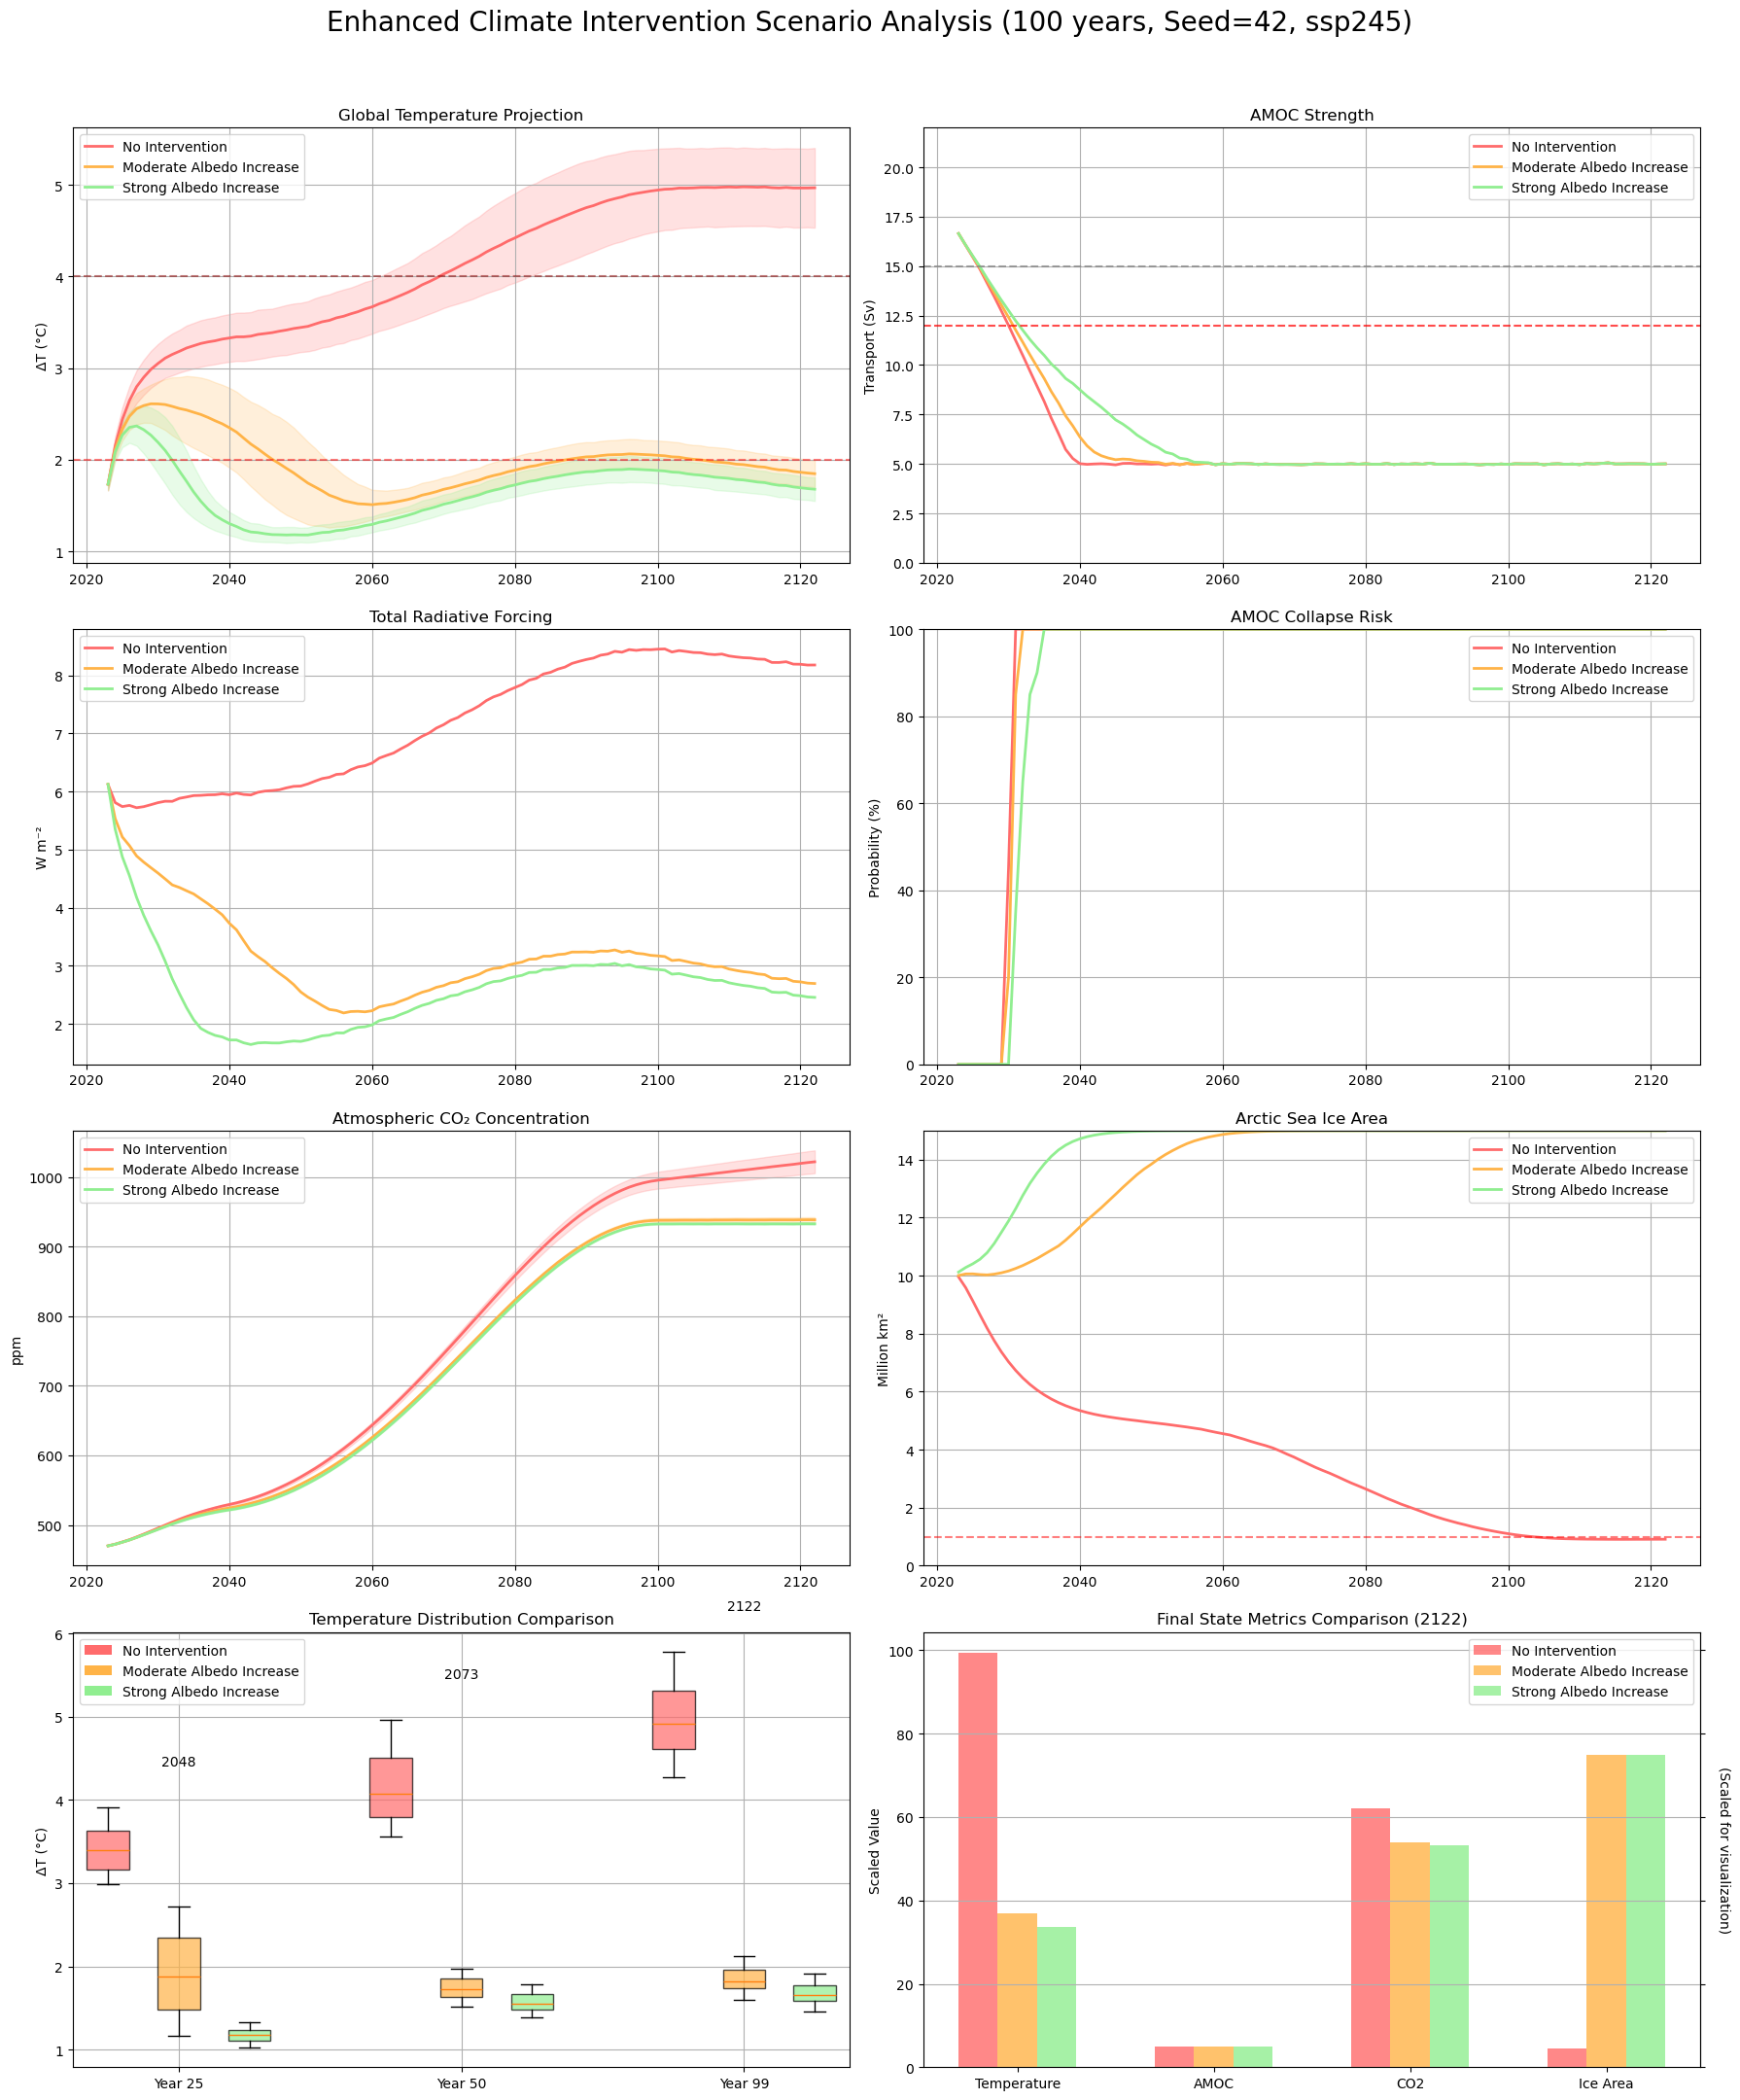

C:\Users\xxx\AppData\Local\Temp\ipykernel_33760\1944252142.py:322: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  .applymap(color_temp, subset=['ΔT (°C)'])
C:\Users\xxx\AppData\Local\Temp\ipykernel_33760\1944252142.py:323: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  .applymap(color_amoc, subset=['AMOC (Sv)'])
C:\Users\xxx\AppData\Local\Temp\ipykernel_33760\1944252142.py:324: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  .applymap(color_co2, subset=['CO₂ (ppm)'])
C:\Users\xxx\AppData\Local\Temp\ipykernel_33760\1944252142.py:325: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  .applymap(color_ice, subset=['Ice Area (M km²)'])
C:\Users\xxx\AppData\Local\Temp\ipykernel_33760\1944252142.py:326: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  .applymap(color_permafrost, subset=['Permafrost Loss (%)'])
C:\Users\xxx\AppData\Local\Temp\ipyk

,ΔT (°C),AMOC (Sv),CO₂ (ppm),Ice Area (M km²),Permafrost Loss (%),P(>2°C),P(>4°C),AMOC Risk,Low Ice Risk
Scenario,,,,,,,,,
No Intervention,4.97 ± 0.43,5.0 ± 0.1,1022 ± 16,0.91 ± 0.22,11.9%,100.0%,100.0%,100.0%,100.0%
Moderate Albedo Increase,1.85 ± 0.15,5.0 ± 0.1,939 ± 4,15.00 ± 0.00,1.0%,15.0%,0.0%,100.0%,0.0%
Strong Albedo Increase,1.68 ± 0.13,5.0 ± 0.1,933 ± 1,15.00 ± 0.00,0.3%,0.0%,0.0%,100.0%,0.0%


In [186]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assumes EarthSystemModel, START_YEAR, GLOBAL_SEED are imported from your final model module

PREINDUSTRIAL_CO2_CONSTANT = 280.0  # ppm, used to reconstruct permafrost forcing from F_ssp

class ClimateEnsemble:
    def __init__(self, n_members=5, base_seed=GLOBAL_SEED, scenario='ssp460'):
        self.n_members = n_members
        self.models = [
            self._perturb_model(EarthSystemModel(seed=base_seed + i, scenario=scenario), base_seed + i)
            for i in range(n_members)
        ]

    def _perturb_model(self, model, seed):
        """Apply moderate parameter perturbations within plausible AR6-ish ranges for ensemble spread."""
        rng = np.random.RandomState(seed)
        model.rng = rng

        # ECS -> feedback parameter
        ecs = rng.triangular(2.2, 2.7, 3.6)  # modest spread around ~2.6–2.7
        model.params['ecs'] = float(ecs)
        model.params['lambda_feedback'] = 3.7 / float(ecs)

        # 2-box thermal capacities & ocean exchange
        model.params['C_mixed']      *= rng.uniform(0.9, 1.15)
        model.params['C_deep']       *= rng.uniform(0.9, 1.15)
        model.params['kappa_ocean']  *= rng.uniform(0.85, 1.15)

        # AMOC sensitivity / thresholds
        model.params['amoc_threshold']        *= rng.uniform(0.85, 1.15)
        model.params['amoc_freshwater_slope'] *= rng.uniform(0.85, 1.15)

        # Arctic amplification & seasonal amplitude
        model.params['arctic_amplification']  *= rng.uniform(0.95, 1.08)
        model.params['seasonal_amp_base']     *= rng.uniform(0.95, 1.05)

        # Permafrost sensitivity
        model.params['permafrost_thaw_factor']   *= rng.uniform(0.8, 1.25)
        model.params['permafrost_threshold_anom'] += rng.normal(0.0, 0.2)

        # Aerosols (ops side-effect)
        model.params['aerosol_direct_effect'] *= rng.uniform(0.85, 1.15)
        model.params['aerosol_cloud_effect']  *= rng.uniform(0.85, 1.15)

        # Cloud module small spread
        model.params['cloud_temp_sensitivity']      *= rng.uniform(0.9, 1.1)
        model.params['cloud_icearea_coupling']      *= rng.uniform(0.9, 1.1)
        model.params['cloud_intervention_coupling'] *= rng.uniform(0.9, 1.1)
        model.params['cloud_noise_sigma']           *= rng.uniform(0.9, 1.1)

        # Global intervention efficacy (only matters if you opt-in with a 'global' intervention)
        model.params['global_intervention_albedo_gain'] *= rng.uniform(0.9, 1.1)

        return model

    def run_year(self, interventions):
        """Advance all ensemble members with controlled randomness and return list of state dicts."""
        results = []
        for model in self.models:
            state = model.update(interventions)

            # Small internal variability on a few diagnostics (visual only; does not feed back)
            state['global_temp']      += model.rng.normal(0, 0.01)
            state['amoc']             += model.rng.normal(0, 0.1)
            state['co2_display_ppm']  += model.rng.normal(0, 0.2)

            # Reconstruct permafrost forcing ΔF_pf from CO2 vs SSP baseline CO2-equivalent
            F_ssp = state['ssp_baseline_forcing']
            co2_total = state['co2_display_ppm']
            co2_baseline = PREINDUSTRIAL_CO2_CONSTANT * np.exp(F_ssp / 5.35)
            if co2_baseline > 0 and co2_total > 0:
                deltaF_permafrost = 5.35 * np.log(max(1e-14, co2_total / co2_baseline))
            else:
                deltaF_permafrost = 0.0

            # Compose total forcing seen by the system (diagnostic)
            state['total_forcing'] = (
                F_ssp
                + deltaF_permafrost
                + state.get('albedo_forcing_regional', 0.0)
                + state.get('albedo_forcing_global', 0.0)
                + state.get('aerosol_forcing', 0.0)
                + state.get('cloud_forcing', 0.0)
            )

            # Convenience fields expected by downstream plotting/table code
            state['co2'] = state['co2_display_ppm']
            state['permafrost_carbon'] = model.regions['arctic']['permafrost_carbon']

            results.append(state)
        return results


def scenario_analyzer(years=100, n_ensemble=5, seed=GLOBAL_SEED, scenario='ssp460'):
    scenarios = {
        'No Intervention': {},
        'Moderate Albedo Increase': {'arctic': {'target': 0.05, 'ramp_years': 10}},
        'Strong Albedo Increase':   {'arctic': {'target': 0.10, 'ramp_years': 10}},
    }

    fig, axs = plt.subplots(4, 2, figsize=(18, 22))
    plt.suptitle(
        f'Enhanced Climate Intervention Scenario Analysis ({years} years, Seed={seed}, {scenario})',
        fontsize=20, y=0.98
    )

    colors = {
        'No Intervention': '#ff6b6b',          # Red
        'Moderate Albedo Increase': '#ffb347', # Orange
        'Strong Albedo Increase': '#90ee90',   # Green
    }

    # Storage
    all_results = {scn: {
        'global_temp': np.zeros((n_ensemble, years)),
        'amoc': np.zeros((n_ensemble, years)),
        'total_forcing': np.zeros((n_ensemble, years)),
        'co2': np.zeros((n_ensemble, years)),
        'ice_area': np.zeros((n_ensemble, years)),
        'arctic_albedo': np.zeros((n_ensemble, years)),
        'permafrost_carbon': np.zeros((n_ensemble, years)),
    } for scn in scenarios}

    years_arr = np.arange(START_YEAR, START_YEAR + years)

    # Run ensembles
    for scn, intervention in scenarios.items():
        print(f"Running scenario: {scn}...")
        ensemble = ClimateEnsemble(n_members=n_ensemble, base_seed=seed, scenario=scenario)

        for year_idx in range(years):
            results = ensemble.run_year(intervention)
            for member_idx, state in enumerate(results):
                all_results[scn]['global_temp'][member_idx, year_idx]    = state['global_temp']
                all_results[scn]['amoc'][member_idx, year_idx]          = state['amoc']
                all_results[scn]['total_forcing'][member_idx, year_idx] = state['total_forcing']
                all_results[scn]['co2'][member_idx, year_idx]           = state['co2']
                all_results[scn]['ice_area'][member_idx, year_idx]      = state['ice_area'] / 1e6  # -> M km²
                all_results[scn]['arctic_albedo'][member_idx, year_idx] = state['arctic_albedo']
                all_results[scn]['permafrost_carbon'][member_idx, year_idx] = state['permafrost_carbon']

    # 1) Global Temperature Projection
    ax = axs[0, 0]
    for scn in scenarios:
        data = all_results[scn]
        mean_temp = np.mean(data['global_temp'], axis=0)
        std_temp  = np.std(data['global_temp'], axis=0)
        ax.plot(years_arr, mean_temp, label=scn, color=colors[scn], lw=2)
        ax.fill_between(years_arr, mean_temp - std_temp, mean_temp + std_temp, alpha=0.2, color=colors[scn])
    ax.set_title('Global Temperature Projection'); ax.set_ylabel('ΔT (°C)'); ax.grid(True); ax.legend()
    ax.axhline(y=2.0, color='red', linestyle='--', alpha=0.5)
    ax.axhline(y=4.0, color='darkred', linestyle='--', alpha=0.5)

    # 2) AMOC Strength
    ax = axs[0, 1]
    for scn in scenarios:
        mean_amoc = np.mean(all_results[scn]['amoc'], axis=0)
        ax.plot(years_arr, mean_amoc, label=scn, color=colors[scn], lw=2)
    ax.axhline(y=15, color='gray', linestyle='--', alpha=0.7)
    ax.axhline(y=12, color='red', linestyle='--', alpha=0.7)
    ax.set_title('AMOC Strength'); ax.set_ylabel('Transport (Sv)'); ax.set_ylim(0, 22); ax.grid(True); ax.legend()

    # 3) Total Forcing Evolution
    ax = axs[1, 0]
    for scn in scenarios:
        mean_forcing = np.mean(all_results[scn]['total_forcing'], axis=0)
        ax.plot(years_arr, mean_forcing, label=scn, color=colors[scn], lw=2)
    ax.set_title('Total Radiative Forcing'); ax.set_ylabel('W m⁻²'); ax.grid(True); ax.legend()

    # 4) AMOC Collapse Risk
    ax = axs[1, 1]
    for scn in scenarios:
        amoc_risk = np.mean(all_results[scn]['amoc'] < 12, axis=0) * 100.0
        ax.plot(years_arr, amoc_risk, label=scn, color=colors[scn], lw=2)
    ax.set_title('AMOC Collapse Risk'); ax.set_ylabel('Probability (%)'); ax.set_ylim(0, 100); ax.grid(True); ax.legend()

    # 5) CO₂ Concentration
    ax = axs[2, 0]
    for scn in scenarios:
        mean_co2 = np.mean(all_results[scn]['co2'], axis=0)
        std_co2  = np.std(all_results[scn]['co2'], axis=0)
        ax.plot(years_arr, mean_co2, label=scn, color=colors[scn], lw=2)
        ax.fill_between(years_arr, mean_co2 - std_co2, mean_co2 + std_co2, alpha=0.2, color=colors[scn])
    ax.set_title('Atmospheric CO₂ Concentration'); ax.set_ylabel('ppm'); ax.grid(True); ax.legend()

    # 6) Arctic Ice Area
    ax = axs[2, 1]
    for scn in scenarios:
        mean_ice = np.mean(all_results[scn]['ice_area'], axis=0)
        ax.plot(years_arr, mean_ice, label=scn, color=colors[scn], lw=2)
    ax.set_title('Arctic Sea Ice Area'); ax.set_ylabel('Million km²'); ax.set_ylim(0, 15); ax.grid(True); ax.legend()
    ax.axhline(y=1.0, color='red', linestyle='--', alpha=0.5)

    # 7) Temperature Distributions at Key Years
    ax = axs[3, 0]
    years_show = [START_YEAR + 25, START_YEAR + 50, START_YEAR + years - 1]
    group_positions = np.arange(len(years_show)) * 4
    from matplotlib.patches import Patch
    for i, year in enumerate(years_show):
        idx = year - START_YEAR
        if not (0 <= idx < years): continue
        base = group_positions[i]
        all_temps = []
        for j, scn in enumerate(scenarios):
            temps = all_results[scn]['global_temp'][:, idx]
            all_temps.append(temps)
            pos = base + j
            bp = ax.boxplot(temps, positions=[pos], widths=0.6, patch_artist=True)
            for box in bp['boxes']:
                box.set_facecolor(colors[scn]); box.set_alpha(0.7)
        overall_max = np.max(np.concatenate(all_temps))
        ax.text(base + 1, overall_max + 0.5, f'{year}', ha='center', fontsize=10)
    ax.set_xticks(group_positions + 1)
    ax.set_xticklabels([f'Year {y-START_YEAR}' for y in years_show])
    ax.set_title('Temperature Distribution Comparison'); ax.set_ylabel('ΔT (°C)'); ax.grid(True)
    legend_elements = [Patch(facecolor=colors[scn], label=scn) for scn in scenarios]
    ax.legend(handles=legend_elements, loc='upper left')

    # 8) Final State Metrics Comparison
    ax = axs[3, 1]
    metrics = ['Temperature', 'AMOC', 'CO2', 'Ice Area']
    scenario_metrics = {}
    for scn in scenarios:
        data = all_results[scn]
        temp = np.mean(data['global_temp'][:, -1])
        amoc = np.mean(data['amoc'][:, -1])
        co2  = np.mean(data['co2'][:, -1])
        ice  = np.mean(data['ice_area'][:, -1])
        scenario_metrics[scn] = [temp * 20, amoc, (co2 - 400) / 10, ice * 5]
    width = 0.2; x = np.arange(len(metrics))
    for i, scn in enumerate(scenarios):
        offset = width * (i - 1)
        ax.bar(x + offset, scenario_metrics[scn], width, label=scn, color=colors[scn], alpha=0.8)
    ax.set_title(f'Final State Metrics Comparison ({START_YEAR + years - 1})')
    ax.set_xticks(x); ax.set_xticklabels(metrics); ax.set_ylabel('Scaled Value'); ax.grid(True, axis='y'); ax.legend()
    sec_ax = ax.secondary_yaxis('right'); sec_ax.set_yticklabels([])
    sec_ax.set_ylabel('(Scaled for visualization)', rotation=270, labelpad=15)

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

    return generate_results_table(all_results, years)


def generate_results_table(all_results, years):
    """Create comprehensive results table for final-year outcomes."""
    results = []
    for scn, data in all_results.items():
        final_temp   = data['global_temp'][:, -1]
        final_amoc   = data['amoc'][:, -1]
        final_co2    = data['co2'][:, -1]
        final_ice    = data['ice_area'][:, -1]
        final_pfcarb = data['permafrost_carbon'][:, -1]

        mean_temp, std_temp = np.mean(final_temp), np.std(final_temp)
        mean_amoc, std_amoc = np.mean(final_amoc), np.std(final_amoc)
        mean_co2,  std_co2  = np.mean(final_co2),  np.std(final_co2)
        mean_ice,  std_ice  = np.mean(final_ice),  np.std(final_ice)

        p_gt2c = np.mean(final_temp > 2.0) * 100
        p_gt4c = np.mean(final_temp > 4.0) * 100
        amoc_risk = np.mean(final_amoc < 12) * 100
        low_ice_risk = np.mean(final_ice < 2) * 100  # <2 M km²
        permafrost_loss = 100 * (1 - np.mean(final_pfcarb) / 1200.0)

        results.append({
            'Scenario': scn,
            'ΔT (°C)': f"{mean_temp:.2f} ± {std_temp:.2f}",
            'AMOC (Sv)': f"{mean_amoc:.1f} ± {std_amoc:.1f}",
            'CO₂ (ppm)': f"{mean_co2:.0f} ± {std_co2:.0f}",
            'Ice Area (M km²)': f"{mean_ice:.2f} ± {std_ice:.2f}",
            'Permafrost Loss (%)': f"{permafrost_loss:.1f}%",
            'P(>2°C)': f"{p_gt2c:.1f}%",
            'P(>4°C)': f"{p_gt4c:.1f}%",
            'AMOC Risk': f"{amoc_risk:.1f}%",
            'Low Ice Risk': f"{low_ice_risk:.1f}%",
        })

    df = pd.DataFrame(results).set_index('Scenario')

    # Styling helpers
    def color_temp(val):
        num = float(val.split('±')[0].strip())
        if num > 3.5: return 'background-color: #ff6b6b; color: white'
        if num > 2.0: return 'background-color: #ffb347'
        return 'background-color: #90ee90'

    def color_amoc(val):
        num = float(val.split('±')[0].strip())
        if num < 12: return 'background-color: #ff6b6b; color: white'
        if num < 15: return 'background-color: #ffb347'
        return 'background-color: #90ee90'

    def color_co2(val):
        num = float(val.split('±')[0].strip())
        if num > 800: return 'background-color: #ff6b6b; color: white'
        if num > 600: return 'background-color: #ffb347'
        return 'background-color: #90ee90'

    def color_ice(val):
        num = float(val.split('±')[0].strip())
        if num < 1: return 'background-color: #ff6b6b; color: white'
        if num < 3: return 'background-color: #ffb347'
        return 'background-color: #90ee90'

    def color_permafrost(val):
        num = float(val.replace('%', '').strip())
        if num > 40: return 'background-color: #ff6b6b; color: white'
        if num > 20: return 'background-color: #ffb347'
        return 'background-color: #90ee90'

    def color_risk(val):
        num = float(val.replace('%', '').strip())
        if num > 75: return 'background-color: #ff6b6b; color: white'
        if num > 25: return 'background-color: #ffb347'
        return 'background-color: #90ee90'

    styled_df = (df.style
        .applymap(color_temp, subset=['ΔT (°C)'])
        .applymap(color_amoc, subset=['AMOC (Sv)'])
        .applymap(color_co2, subset=['CO₂ (ppm)'])
        .applymap(color_ice, subset=['Ice Area (M km²)'])
        .applymap(color_permafrost, subset=['Permafrost Loss (%)'])
        .applymap(color_risk, subset=['P(>2°C)', 'P(>4°C)', 'AMOC Risk', 'Low Ice Risk'])
        .set_properties(**{'text-align': 'center'})
        .set_table_styles([
            {'selector': 'th', 'props': [('font-size', '12px'), ('background-color', '#f7f7f7')]},
            {'selector': 'td', 'props': [('font-size', '11px')]}
        ])
        .set_caption(f'Climate Scenario Outcomes ({START_YEAR + years - 1})')
    )
    return styled_df


# Example run:
results_table = scenario_analyzer(years=100, n_ensemble=20, seed=GLOBAL_SEED, scenario='ssp245')
display(results_table)
